In [22]:
# Загрузим библиотеки, участвующие в обработке данных и в их исследовании.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

diagran_counter = 0
def title_num(stitle):
    global diagran_counter
    diagran_counter += 1
    return ("Диаграмма " + str(diagran_counter) + ". " + stitle)
    

# Context (*Контекст*)

In [23]:
# Подгрузим данные для их исследования:
df = pd.read_csv("train_titanic.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [24]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S
99999,0,3,"Enciso, Tyler",male,55.0,0,0,458074,13.96,NaN,S


# Data quality assessment (*Оценка качества данных*)

Что это означает качество данных?

Это определённые требования и показатели качества данных. К ним относятся:
* Достоверность данных — Validity
* Точность — Accuracy
* Завершенность — Completeness
* Консистенция — Consistency
* Единообразие — Uniformity

### Достоверность данных
* Ограничения типа данных: значения в определенном столбце должны иметь определенный тип данных, например, логическое, числовое, формат даты и т.д.
* Ограничения диапазона (Range Constraints): как правило, числа или даты должны попадать в определенный диапазон.
* Ограничения уникальности (Unique Constraints): поле или комбинация полей должны быть уникальными в наборе данных.
* Ограничения Set-Membership: значения столбца происходят из набора дискретных значений, например, пол человека может быть «мужской» или «женский». Т.е. фиксированный, редко изменяемый набор значений (или никогда не изменяющийся).
* и т.п.

### Точность — Accuracy
Степень, в которой данные близки к истинным значениям.

### Завершенность — Completeness
Степень, в которой все необходимые данные известны.

### Консистенция — Consistency
Степень соответствия данных в одном наборе данных или в нескольких наборах данных.

### Единообразие — Uniformity
Степень, в которой данные указываются с использованием одной и той же единицы измерения.



In [25]:
# Посмотрим на типы столбцов и их наполненность.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


Видим, что все столбцы соответствуют "**Ограничениям типа данных**" (требование в части Достоверности данных).

Проверим:
* "**Ограничения диапазона**"
* "**Ограничения уникальности**"
* "**Ограничения Set-Membership**"

(выводы в конце - в разделе **Summary**)

In [26]:
# Возможные значения атрибута "Спасшийся":
df.Survived.unique().tolist()

[1, 0]

In [27]:
# Возможные значения атрибута "Класс билета":
df.Pclass.unique().tolist()

[1, 3, 2]

In [28]:
# Возможная половая принадлежность:
df.Sex.unique().tolist()

['male', 'female']

In [29]:
# Границы значений возраста:
df.Age.min(), df.Age.max()

(0.08, 87.0)

In [30]:
# Возможные значения количества, находящихся на борту братьев и сестёр, с учетом мужа и жены данного пасажира.
sorted(df.SibSp.unique().tolist())

[0, 1, 2, 3, 4, 5, 8]

In [31]:
# Возможные значения количества, находящихся на борту детей и родителей данного пасажира.
sorted(df.Parch.unique().tolist())

[0, 1, 2, 3, 4, 5, 6, 9]

In [32]:
df.Fare.min(), df.Fare.max()

(0.68, 744.66)

In [33]:
df.Embarked.unique().tolist()

['S', 'C', 'Q', nan]

In [34]:
df.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

Видим, что есть пропуски.
Визуально посмотрим пропуски в данных по всем столбцам:

Зафиксируем исходное количество строк и столбцов, что бы по завершении исследования увидеть изменения:

In [35]:
df_start_shape = df.shape
print(df_start_shape)

(100000, 11)


In [36]:
# Посмотрим проценты пропусков в данных по столбцам:
missing_values = ((df.isna().sum() / df_start_shape[0]) * 100 ).sort_values(ascending=False)
print("-------------------------------")
print("Процент пропущенных значений:")
print(missing_values)
print("-------------------------------")
missing_values = df.isna().sum().sort_values(ascending=False)
print("Количество пропущенных значений:")
print(missing_values)
print("-------------------------------")


-------------------------------
Процент пропущенных значений:
Cabin       67.866
Ticket       4.623
Age          3.292
Embarked     0.250
Fare         0.134
Survived     0.000
Pclass       0.000
Name         0.000
Sex          0.000
SibSp        0.000
Parch        0.000
dtype: float64
-------------------------------
Количество пропущенных значений:
Cabin       67866
Ticket       4623
Age          3292
Embarked      250
Fare          134
Survived        0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
dtype: int64
-------------------------------


#### Проверим на наличие дубликатов:

In [37]:
df_dupl = df[df.duplicated(keep=False)]
df_dupl

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


**В этом разделе необходимо рассмотреть наличие выбросов. Но на мой взгляд эту часть стоит перенести в следующий раздел, так как изучение выбросов можно рассматривать как продолжение изучения "ящика с усами".**

# Data exploration (*Исследование данных*)

### Информация для понимания содержимого столбцов:

| Столбец       | Описание              | Значения      
|:--------------|:----------------------|:-------------
| **Survived**  | Выжил или нет         | 0=Нет, 1=Да   
| **Pclass**    | Класс билета          | 1st, 2nd, 3rd 
| **Name**      | Имя пассажира         |               
| **Sex**       | пол                   | male, female  
| **Age**       | Возраст               | в годах       
| **SibSp**     | братья + мужья и жены |               
| **Parch**     | Родители + дети       |               
| **Ticket**    | Номер билета          |               
| **Fare**      | Плата за проезд       |               
| **Cabin**     | Номер каюты           |               
| **Embarked**  | Порт посадки на борт  | C = Cherbourg  
|               |                       | Q = Queenstown
|               |                       | S = Southampton 

**Примечания к переменным**

**pclass**: Доступность для социально-экономического статуса (SES)
	1st = Upper
	2nd = Middle
	3rd = Lower

**age**: Возраст является дробным, если он меньше 1. Если же возраст дольше 1, то он в виде xx.5 (с точностью до полугода)

**sibsp**: Набор данных определяющий следующие семейные отношения (горизонтальные):
	Sibling = брат, сестра, сводный брат, сводная сестра
	Spouse = муж, жена (любовницы и женихи игнорировались)

**parch**: Набор данных определяющий следующие семейные отношения (вертикальные):
	Parent = отец, мать
	Child = дети: дочь, сын, падчерица, пасынок
(Некоторые дети путешествовали только с няней, поэтому для них parch=0)

#### Общая картина по данным выглядит так:

In [38]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


Видим, что нет нарушения смысла параметров `возраст` и `цена`:
* больше нуля;
* не превышают некоторых "адекватных" границ.



#### Рассмотрим распределение отдельных параметров:

In [39]:
df.Survived.value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

In [40]:
df.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

In [41]:
df.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

In [42]:
df.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

Можно рассмотреть распределение значений по столбцам `sibsp` и `parch`, но эти данные без понимания контекста несут невнятный и малоприменимый смысл:

In [43]:
df.SibSp.value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

In [44]:
df.Parch.value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

Распределение `Ticket` и `Cabin` вообще лишено смысла.

У нас два столбца с числовыми значениями из диапазона, распределение которых стоит расмотреть отдельно. Это `Age` и `Fare`.

Все остальный судя по их описанию - это категориальные признаки.

#### Изучим отдельно: Age

In [45]:
# Статистики:
df.Age.describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

**Средний возраст**: 38 полных лет

**Самый старый**: 87 полных лет

**Самый маленький**: 0.8 года


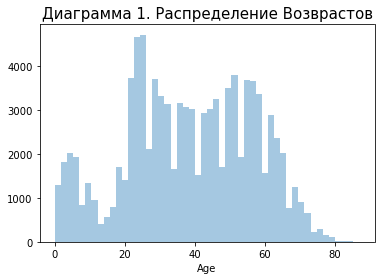

In [46]:
sns.distplot(a=df[df.Age.isna()==False]['Age'], kde=False)

plt.title(title_num("Распределение Возврастов"), fontsize=15);

Рассмотрим распределения разных наборов возрастов (разные группировки):

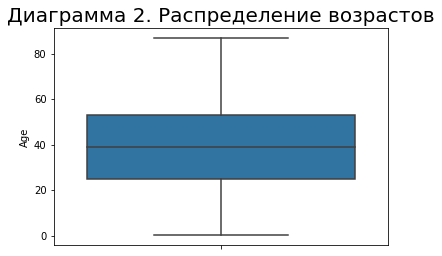

In [47]:
sns.boxplot(y="Age", data=df)
plt.title(title_num("Распределение возрастов"), fontsize=20);


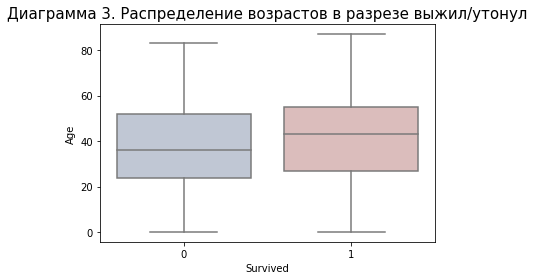

In [48]:
sns.boxplot(x="Survived", y="Age", data=df, palette="vlag")
plt.title(title_num("Распределение возрастов в разрезе выжил/утонул"), fontsize=15);


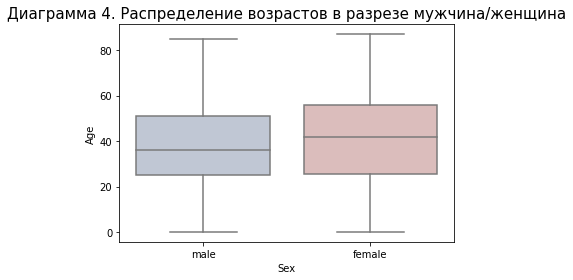

In [49]:
sns.boxplot(x="Sex", y="Age", data=df, palette="vlag")
plt.title(title_num("Распределение возрастов в разрезе мужчина/женщина"), fontsize=15);


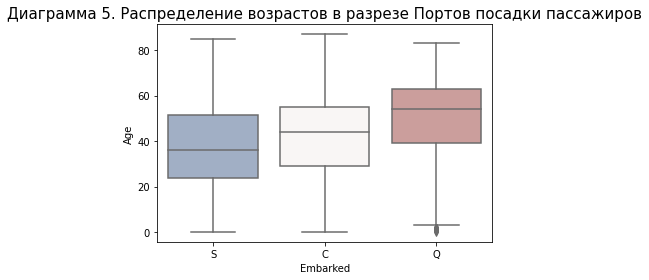

In [50]:
sns.boxplot(x="Embarked", y="Age", data=df, palette="vlag")
plt.title(title_num("Распределение возрастов в разрезе Портов посадки пассажиров"), fontsize=15);


**Здесь видим небольшой выброс** для порта посадки Q = Queenstown.

Посмотрим на эти значения.

In [51]:
# Найдём пороги:
df_Age_Q = df[df["Embarked"]=="Q"]["Age"]
q25 = df_Age_Q.quantile(0.25)
q75 = df_Age_Q.quantile(0.75)
iqr = q75 - q25
bottom_line = q25 - iqr * 1.5
top_line = q75 + iqr * 1.5
min_Age_Q = float(df_Age_Q.min())
max_Age_Q = float(df_Age_Q.max())

print("Границы для оценки выбросов следуюшие:")
print(f"   нижняя: {bottom_line}")
print(f"   верхняя: {top_line}\n")
if min_Age_Q < bottom_line:
    print(f"Минимальное значание '{min_Age_Q}' ниже нижней границы. Это выброс.")
else:
    print(f"Минимальное значание '{min_Age_Q}' выше нижней границы. Это обычное значение.")

if max_Age_Q > top_line:
    print(f"Максимальное значание '{max_Age_Q}' выше верхней границы. Это выброс.")
else:
    print(f"Максимальное значание '{max_Age_Q}' ниже верхней границы. Это обычное значение.")


Границы для оценки выбросов следуюшие:
   нижняя: 3.0
   верхняя: 99.0

Минимальное значание '0.25' ниже нижней границы. Это выброс.
Максимальное значание '83.0' ниже верхней границы. Это обычное значение.


In [52]:
# Список выбросов по возрасту для пассажиров с посадкой в порту Q = Queenstown:
df[(df["Embarked"]=="Q") & (df["Age"] < bottom_line)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
7839,0,3,"Rovero, Demetrius",male,2.00,1,1,C.A. 15372,25.82,NaN,Q
8513,0,3,"Phillips, Peter",male,2.00,0,0,STON/O 168011,9.15,NaN,Q
13794,0,3,"Cross, Kayla",female,1.00,4,1,11841,28.61,NaN,Q
18043,0,3,"Gunning, Frank",male,2.00,1,2,A/5 13459,34.17,NaN,Q
23802,1,3,"Moret, Lue",female,0.25,0,0,A. 13869,7.99,NaN,Q
30821,1,2,"Alatorre, Marie",female,2.00,2,0,39336,52.00,NaN,Q
40782,0,3,"Miller, Bryan",male,0.83,1,2,C.A. 413630,31.73,NaN,Q
51360,0,3,"Watton, Camille",female,2.00,1,1,8522,27.14,NaN,Q
61073,0,3,"Greene, Ben",male,2.00,0,0,A. 39072,8.76,NaN,Q


#### Перейдём к изучению другого параметра: Fare

In [53]:
# Статистики:
df.Fare.describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

**Средняя стоимость**: 43

**Самый дорогой**: 744

**Самый дешёвый**: 0.68

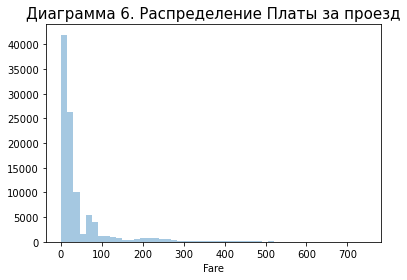

In [54]:
sns.distplot(a=df[df.Fare.isna()==False]['Fare'], kde=False)
plt.title(title_num("Распределение Платы за проезд"), fontsize=15);


Рассмотрим распределения разных наборов Плат за проезд (разные группировки):

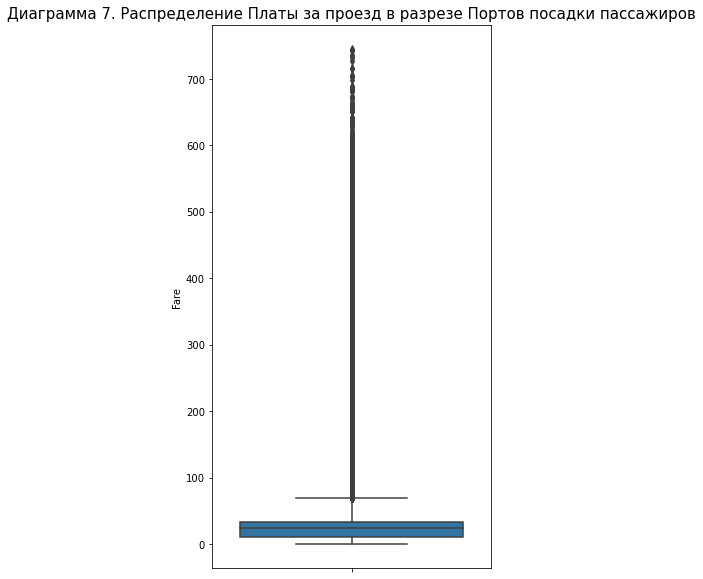

In [55]:
plt.figure(figsize=(5,10))
sns.boxplot(y="Fare", data=df)
plt.title(title_num("Распределение Платы за проезд в разрезе Портов посадки пассажиров"), fontsize=15);


Сразу видим значительные выбросы по цене проезда. Рассмотрим их подробнее.

In [56]:
# Найдём пороги:
df_Fare = df["Fare"]
q25 = df_Fare.quantile(0.25)
q75 = df_Fare.quantile(0.75)
iqr = q75 - q25
bottom_line = q25 - iqr * 1.5
top_line = q75 + iqr * 1.5
min_Fare = float(df_Fare.min())
max_Fare = float(df_Fare.max())

print("Границы для оценки выбросов следуюшие:")
print(f"   нижняя: {bottom_line}")
print(f"   верхняя: {top_line}\n")
if min_Fare < bottom_line:
    print(f"Минимальное значание '{min_Fare}' ниже нижней границы. Это выброс.")
else:
    print(f"Минимальное значание '{min_Fare}' выше нижней границы. Это обычное значение.")

if max_Fare > top_line:
    print(f"Максимальное значание '{max_Fare}' выше верхней границы. Это выброс.")
else:
    print(f"Максимальное значание '{max_Fare}' ниже верхней границы. Это обычное значение.")


Границы для оценки выбросов следуюшие:
   нижняя: -25.15
   верхняя: 68.69

Минимальное значание '0.68' выше нижней границы. Это обычное значение.
Максимальное значание '744.66' выше верхней границы. Это выброс.


In [57]:
# Количество выбросов по Плате за проезд:
out_ko_bo = df[df["Fare"] > top_line].shape[0]
out_proc = round(df[df["Fare"] > top_line].shape[0]/df_start_shape[0]*100, 1)
print( \
      f"Количество выбросов по Плате за билет составляет: {out_ko_bo} шт, что составляет {out_proc}%")

Количество выбросов по Плате за билет составляет: 17161 шт, что составляет 17.2%


In [58]:
print("Доля выбросов в Плате за проезд составляет:", round(((len(df[df["Fare"] > top_line]) / len(df)) * 100), 2), "%")
df_tmp = df[df["Fare"] > top_line]
print("Из них выживших:", round(((sum(df_tmp.Survived) / len(df_tmp)) * 100), 2), "%")


Доля выбросов в Плате за проезд составляет: 17.16 %
Из них выживших: 61.49 %


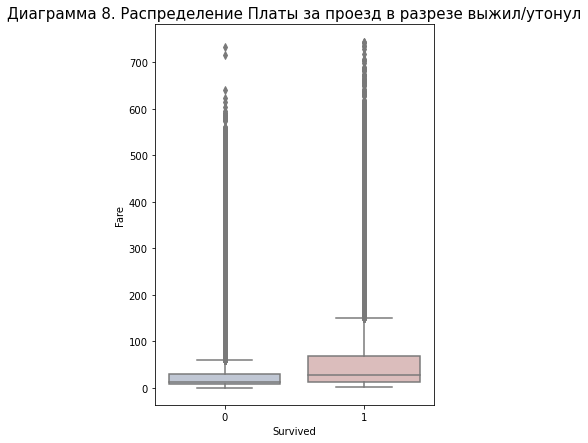

In [59]:
plt.figure(figsize=(5,7))
sns.boxplot(x="Survived", y="Fare", data=df, palette="vlag")
plt.title(title_num("Распределение Платы за проезд в разрезе выжил/утонул"), fontsize=15);


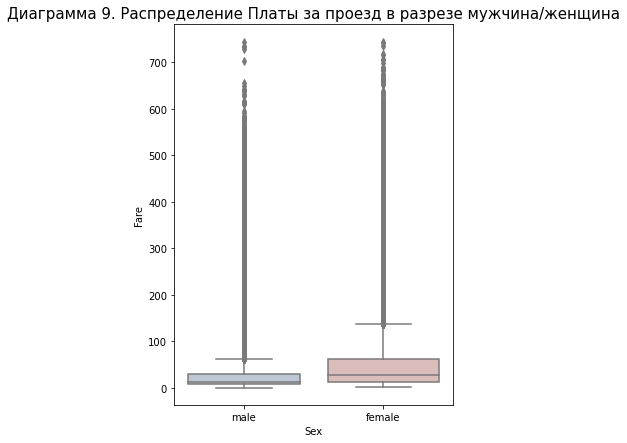

In [60]:
plt.figure(figsize=(5,7))
sns.boxplot(x="Sex", y="Fare", data=df, palette="vlag")
plt.title(title_num("Распределение Платы за проезд в разрезе мужчина/женщина"), fontsize=15);


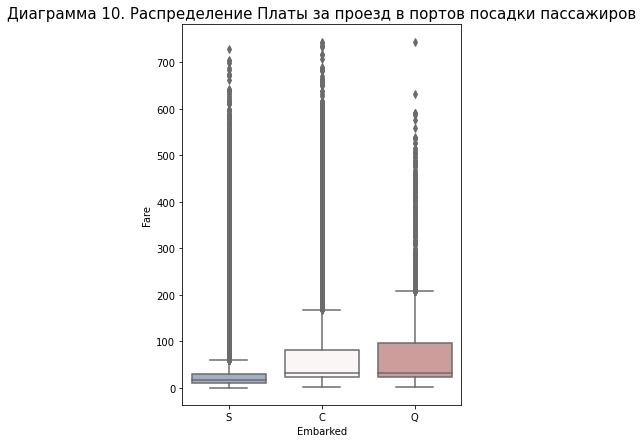

In [61]:
plt.figure(figsize=(5,7))
sns.boxplot(x="Embarked", y="Fare", data=df, palette="vlag")
plt.title(title_num("Распределение Платы за проезд в портов посадки пассажиров"), fontsize=15);


### Исследование `Age` и чем его можно заменить

In [62]:
no_age = df[df["Age"].isna()]
yes_age = df[df["Age"].isna()==False]

print("-------------------------------")
print("Доли выживших в записях где пропущен возраст:", 
    round(no_age[no_age['Survived']==1]['Survived'].count()/len(no_age)*100,2), "%")
print("-------------------------------")
print("Доли выживших в записях где возраст присутствует:", 
    round(yes_age[yes_age['Survived']==1]['Survived'].count()/len(yes_age)*100,2), "%")
print("-------------------------------")


-------------------------------
Доли выживших в записях где пропущен возраст: 41.19 %
-------------------------------
Доли выживших в записях где возраст присутствует: 42.83 %
-------------------------------


Видим, что распределение очень близко, разница в 1,6 единицы. Отметим это!

Посмотрим как распределена стоимость билетов по записям где указан возраст и где пропущен:

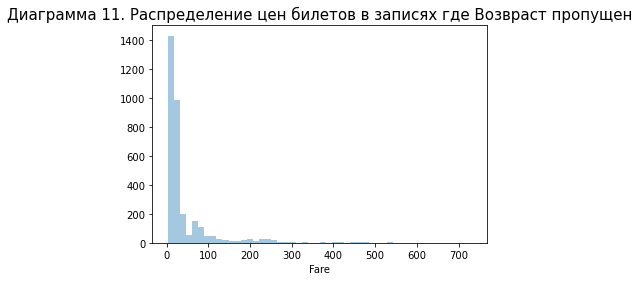

In [63]:
sns.distplot(a=no_age[no_age.Fare.isna()==False]['Fare'], kde=False)
plt.title(title_num("Распределение цен билетов в записях где Возвраст пропущен"), fontsize=15);


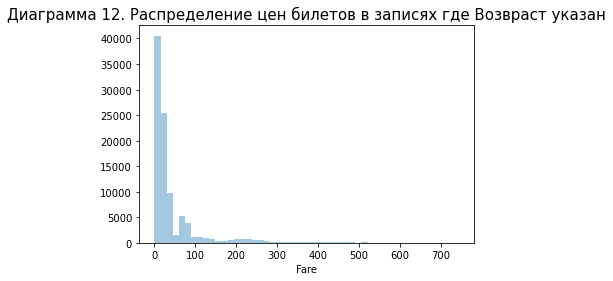

In [64]:
sns.distplot(a=yes_age[yes_age.Fare.isna()==False]['Fare'], kde=False)
plt.title(title_num("Распределение цен билетов в записях где Возвраст указан"), fontsize=15);
# Тоже указано на диаграмме 8

Видим, так же что распределение практически идентично!

Посмотрим как распределена другие атрибуты по записям где указан возраст и где пропущен:

In [65]:
print("-------------------------------")
print("Доли выживших МУЖЧИН в записях где пропущен возраст:", 
    round(no_age[no_age['Sex']=="male"]['Sex'].count()/len(no_age)*100,2), "%")
print("-------------------------------")
print("Доли выживших МУЖЧИН в записях где возраст присутствует:", 
    round(yes_age[yes_age['Sex']=="male"]['Sex'].count()/len(yes_age)*100,2), "%")
print("-------------------------------")


-------------------------------
Доли выживших МУЖЧИН в записях где пропущен возраст: 57.93 %
-------------------------------
Доли выживших МУЖЧИН в записях где возраст присутствует: 56.05 %
-------------------------------


In [66]:
print("-------------------------------")
print("Доли выживших ЖЕНЩИН в записях где пропущен возраст:", 
    round(no_age[no_age['Sex']=="female"]['Sex'].count()/len(no_age)*100,2), "%")
print("-------------------------------")
print("Доли выживших ЖЕНЩИН в записях где возраст присутствует:", 
    round(yes_age[yes_age['Sex']=="female"]['Sex'].count()/len(yes_age)*100,2), "%")
print("-------------------------------")


-------------------------------
Доли выживших ЖЕНЩИН в записях где пропущен возраст: 42.07 %
-------------------------------
Доли выживших ЖЕНЩИН в записях где возраст присутствует: 43.95 %
-------------------------------


Так же видим, что распределение и по МУЖЧИНАМ и по ЖЕНЩИНАМ практически идентично!

Таким образом, пропущенные значения можно заменить средним по возрасту.

Сделаем это:

In [67]:
n_age_mean = yes_age["Age"].mean()
df["Age"] = df["Age"].fillna(n_age_mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       100000 non-null  float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [68]:
# Пустые билеты и каюты заполним соответствующими текстовыми лейблами:
df["Cabin"] = df["Cabin"].fillna("<Каюта не указана>")
df["Ticket"] = df["Ticket"].fillna("<Билет отсутствует>")

# Удалим оставниеся строки содержащие пусторы - это Embarked (250шт) и Fare (134шт)
df = df.dropna(axis=0)
print(f"В итоговом датасете осталось строк: {len(df)}, что на {df_start_shape[0] - len(df)} шт. и {round((df_start_shape[0] - len(df))/len(df)*100, 2)}% меньше чем было в исходном." )

В итоговом датасете осталось строк: 99617, что на 383 шт. и 0.38% меньше чем было в исходном.


In [69]:
msno.matrix(df)
plt.title(title_num("Наличие пропусков в итоговом датасете"), fontsize=25);

NameError: name 'msno' is not defined

In [ ]:
# Посмотрим проценты пропусков в данных по столбцам:
missing_values = ((df.isna().sum() / len(df)) * 100 ).sort_values(ascending=False)
print("-------------------------------")
print("Процент пропущенных значений:")
print(missing_values)
print("-------------------------------")
missing_values = df.isna().sum().sort_values(ascending=False)
print("Количество пропущенных значений:")
print(missing_values)
print("-------------------------------")


# Summary (*Итоги*)

### В результате оценки качества данных можно констатировать:
* Поля: `Survived`, `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare` соответствуют **Достоверности данных**.
* Поля `SibSp`, `Parch` содержат значения (8 и 9), которые скорее всего можнопринять как допустимые;
* Поля `SibSp`, `Parch` несут странный смысл и, как следствие, их возможность их использования не понятна;
* Заметные пропуски у атрибута `Cabin`, но использование номера каюты, скорее всего не имеет смысла.
* Предполагается то, что номер билета `Ticket` (сходя из его смысла) не позволит использовать его в исследовании данных. Кроме этого надо пониманить, что попать на борт без билета и быть учтённым - нельзя. Примем за данность, что пустоты в столбце `Ticket` для нас несущественно, так как нет понимания в возможности использвоания его значений.
* Требования "Степень соответствия данных", "Точность", "Завершенность", "Консистенция", "Единообразие" считаем выполненным по результатм проверки состава данных.

### В исходных даных присутствую пропуски и выбросы,
##### при этом отрицательной стороной является:
* заметное количество пропущенных значений в `Возрасте` пассажиров (~3,3%);
* значительное количество значений являющихся выбросами по Плате за проезд (17161 шт: 17.2% от общего количества строк)

##### а положительной  стороной является:
* малое количество пропусков в столцах `Embarked` и `Fare` (0.25% и 0.13% соответственно);
* предположение об отсутствии полезности в столбцах `Cabin` и `Ticket` имеющих значительные пропуски (67.87% и 4.62% соответственно).


Таким образом, в результате проведённой **оценки** стоит сдалать обобщающий вывод о соответствии **качества данных** требованиям задания при условии очиски данных перед из обработкой, что, может включать:
* удаление строк с незаполненными значениями в столбцах `Embarked` и `Fare`;
* заполнении пропусков по `Возрасту`, например, средними значениеми, так как проверка показала возможность этого (см. описание выше);
* исключив из рассмотрения и обработки столбцы `Номер каюты` и `Номер билета` иил заполнив из не пустыми значениями.

### По результатам:

**Диаграмма 14** (в сравнении с **Диаграммой 1**) показывает, что в итоговом датасете отсутствуют пропущенные значения и он готов к дальнейшему использованию.

# Исследования, проведенные вне рамок домашнего задания
#### (иследование зависимостей и взаимосвязей)

Посмотрим, видна ли зависимость двух количественных переменных: `Возраст` и `Плата за проезд`:

In [ ]:
sns.scatterplot(x=df['Fare'], y=df['Age'], hue=df['Survived'])
plt.title(title_num("Отсутствие видимой зависимости между Возрастом и Платой за проезд"), fontsize=15);


In [ ]:
ports_dict = {"C": 1, "Q": 2, "S": 3, np.nan: 0}
sex_dict = {"male": 1, "female": 2, np.nan: 0}
df["nPort"] = df["Embarked"].apply(lambda p: ports_dict[p])
df["nSex"] = df["Sex"].apply(lambda p: sex_dict[p])

In [ ]:
CorrKoef = df.corr(method='pearson')

plt.figure(figsize=(8,7))
sns.heatmap(CorrKoef, annot=True)
plt.title(title_num("Корреляционная таблица"), fontsize=15);


Заметна некоторая повышенная корелляция по половому признаку.

In [ ]:
def age_type(nage, ntype=1):
    if nage == np.nan:
        retrn ("" if ntype==1 else 0)
    ret_value = ""
    for num, element in enumerate(age_types):
        if (nage > element[1]) & (nage <= element[2]):
            return element[0] if ntype == 1 else num+1

age_types = [
    ["1. Новорождённые", -1, 1], 
    ["2. Дошкольники", 1, 7], 
    ["3. Младшие школьники", 7, 12], 
    ["4. Тинейджеры", 12, 15],
    ["5. Молодые люди", 15, 28],
    ["6. Взрослые люди", 28, 40],
    ["7. Люди от 40 до 60", 40, 60],
    ["8. Пожилые", 60, 200],
           ]
       

df["age_type"] = df["Age"].apply(lambda y: age_type(y))
df["age_ntype"] = df["Age"].apply(lambda y: age_type(y, 2))

plt.figure(figsize=(18,5))

# sns.set(style = 'white', font_scale=1.4)
df_sorted = df.sort_values(by="age_type")
sns.histplot(data=df_sorted, x=df_sorted["age_type"], hue=df_sorted["Survived"])
plt.xlabel('')
plt.xticks(rotation=70, fontsize=15)
plt.legend(['Выжил', 'Умер'], title='')
plt.title(title_num("Выживаемость и смертность по возрастным группам"), fontsize=15);


Здесь мы видим, что почти во всех возрастных группах смертность выше чем выживаемость.

Но совсем другая картина предстанет если разделить по половым признакам:

In [ ]:
def add_name(data):
    return data[0] + (" (М)" if data[1] == 1 else "(Ж)")

plt.figure(figsize=(18,7))

df_sorted["age_type_sex"] = df[["age_type", "nSex"]].apply(lambda rowdata: add_name(rowdata.values), axis=1)

df_sorted = df_sorted.sort_values(by=["age_type", "nSex"])
sns.histplot(data=df_sorted, x=df_sorted["age_type_sex"], hue=df_sorted["Survived"]);
plt.xlabel('')
plt.xticks(rotation=90, fontsize=15)
plt.legend(['Выжил', 'Умер'], title='')
plt.title(title_num("Выживаемость и смертность по возрастным группам"), fontsize=15);


Здесь мы уже видим, что во все группах выживших женщин больше чем погибших. В то время как с мужчинами наоборот - мужчин везде умирло больше чем выжило.

In [ ]:
plt.figure(figsize=(10,5))
df_sorted = df_sorted.sort_values(by=["Embarked"])
sns.histplot(data=df_sorted, x=df_sorted["Embarked"], hue=df_sorted["Survived"], multiple="dodge");
plt.xlabel('')
plt.xticks(fontsize=15)
plt.legend(['Выжил', 'Умер'], title='')
plt.title(title_num("Выживаемость и смертность по Порту посадки пассажира"), fontsize=15);



То есть умирали больше те, кто сел в порту S = Southampton.